### Descripció
##### Exercicis d'algoritmes d'Agrupació.

En este Sprint se trabaja con una base de datos de publicación en la plataforma red social de Facebook Thailandia. 

Nos piden que apliquemos un algoritmo de agrupación K-means para dividir un conjunto de datos en grupos(llamados clusters) basados en patrones o similitudes en los datos. 

A continuación tenemos que clasificar los diferentes registros con un algoritmo de clustering jerárquico que a diferencia de el K-means, no requiere que se especifique de antemano el número de clusters a generar. En su lugar crea una estructura de árbol llamado dendrograma, que muestra la relación de agrupación entre los datos. 

Y para finalizar, nos pide que calculemos el rendimiento del clustering con el coeficiente de Silhouette, y así, calcular la calidad de los clusters obtenidos. 


Antes de comenzar vamos a visualizar los datos y preprocesarlos.

In [1]:
import pandas as pd

In [2]:
# Descargo archivo. 
df = pd.read_csv("Publicacions Facebook Thailandia.csv")

In [3]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


El archivo "Publicacions Facebook Thailandia.csv", contiene información sobre publicaciones realizadas en la plataforma de Facebook relacionadas con Tailandia. 

La descripción de cada variable:

- status_id: Identificación única del estado o publicación en Facebook.
- status_type: Tipo de publicación en Facebook (puede ser una publicación, foto, video, enlace, etc.).
- status_published: Fecha y hora en que se publicó el estado.
- num_reactions: Número total de reacciones a la publicación (suma de todos los tipos de reacciones).
- num_comments: Número de comentarios en la publicación.
- num_shares: Número de veces que se compartió la publicación.
- num_likes: Número de reacciones tipo "Me gusta".
- num_loves: Número de reacciones tipo "Me encanta".
- num_wows: Número de reacciones tipo "Wow".
- num_hahas: Número de reacciones tipo "Haha".
- num_sads: Número de reacciones tipo "Triste".
- num_angrys: Número de reacciones tipo "Enojado".
- Column1, Column2, Column3, Column4: Columnas adicionales sin una descripción específica, probablemente variables que contienen datos específicos para el contexto de las publicaciones.

CONOCIENDO LOS DATOS 

Vamos a utilizar dos métodos que nos ayudaran a obtener un vistazo rápido del conjunto de datos. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

##### Los tipos de datos son números enteros para las columnas:  

    - 'num_reactions'     7050 non-null   int64  
    - 'num_comments'      7050 non-null   int64  
    - 'num_shares'        7050 non-null   int64  
    - 'num_likes'         7050 non-null   int64  
    - 'num_loves'         7050 non-null   int64  
    - 'num_wows'          7050 non-null   int64  
    - 'num_hahas'         7050 non-null   int64  
    - 'num_sads'          7050 non-null   int64  
    - 'num_angrys'        7050 non-null   int64
 
##### para las siguiente columnas son números decimales:

   - 'Column1'           0 non-null      float64
   - 'Column2'           0 non-null      float64
   - 'Column3'           0 non-null      float64
   - 'Column4'           0 non-null      float64

##### y finalmente para el resto de columnas los datos són de cadenas de texto: 

   - 'status_id'         7050 non-null   object 
   - 'status_type'       7050 non-null   object 
   - 'status_published'  7050 non-null   object

##### Estás 3 últimas últimas variables son tipo categóricas y el resto de datos son numéricos. 



In [5]:
df.status_id.unique() 

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

Realmente al id_status se le asigna una denominación en forma numérica.

In [6]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Ésta variable si que está caracterizada por valores categóricos.

In [7]:
df.status_published.unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

Y en ésta variable los datos introducidos son fecha y hora de publicación y también lo determina como objeto.


In [8]:
# Con este código también puedo visualizar todas las columnas para visualizar que los valores coinciden.

for col in df.columns:
  print(f"{col}: \n{df[col].unique()}\n")

status_id: 
['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528']

status_type: 
['video' 'photo' 'link' 'status']

status_published: 
['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']

num_reactions: 
[529 150 227 ... 558 570 415]

num_comments: 
[  512     0   236     6   614   453     1     9     2     4    11   100
   256   173   166    15     7    36    78   300    14     8   137   292
    72    39   181   210    12   456    60   235   444    21   255   136
   327   284   114    81   193    32   258    13   259   468   130   251
   247    89   341   316   368    76    63   171   461   540     3    10
    18    16    25   709  1979    17   145   116   157    46   120   486
     5   199    77   825   805   449    49   589   558    31   424   131
   525    2

También podemos visualizar que las 4 últimas columnas no contienen datos, de ese modo no será necesario seguir con ellas. Realizaré el cambio más adelante. 

Ahora voy a identificar anomalías, datos faltantes o duplicados:

In [9]:
# Valores duplicados
df.duplicated().sum()

51

Nos encontramos con 51 datos duplicados en la base de datos. 

In [10]:
# Voy a comprobar el tamaño de la base de datos

print('El tamaño de df es:', df.shape)

El tamaño de df es: (7050, 16)


La comprobación del tamaño corresponde con lo que indica al mostrar el fichero df, entonces nos indica que no tenemos datos faltantes, ya que coinciden los datos de entrada con tamaño. 

Ahora voy a explorar los tipos de datos de cada columna. Así mismo, identificaré si hay alguna columna que según su significado no coincida con su tipo de dato. 

TIPOS DE DATOS 

In [11]:
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

Podemos decir que la columna status_id, está identificada como object aunque los datos introducidos son numéricos, ya que cada publicación se le identifica con un número diferente. Realmente no tiene mucha relevancia en cuanto a lo que queremos analizar. 

IDENTIFICAR NA

Para identificar los datos faltantes en el conjunto de los datos voy a utilizar isnull y sumar los valores: 

In [12]:
df.isnull().sum() 

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

En las variables de Column1, 2, 3, 4, nos muestran 7050 datos faltantes en cada una de ellas. 

IDENTIFICAR OUTLIERS

Para identificar datos atípicos voy a utilizar un gráfico de box plot para graficar cada una de las variables númericas ya que las que considera como objeto no me deja graficar. 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

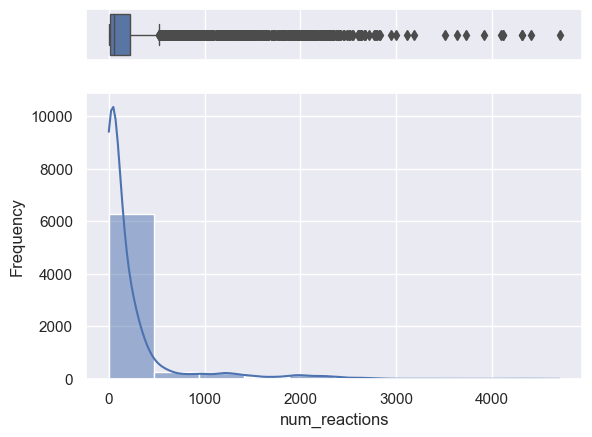

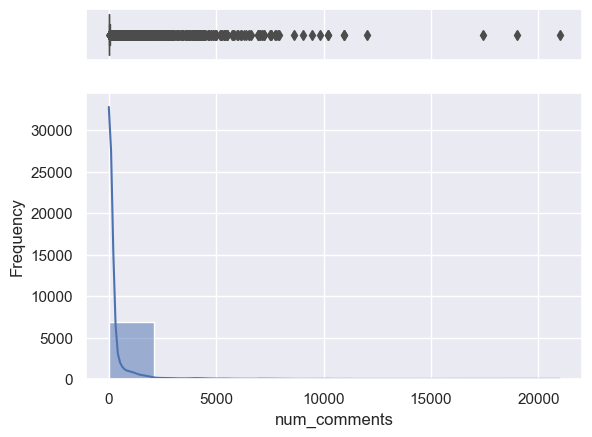

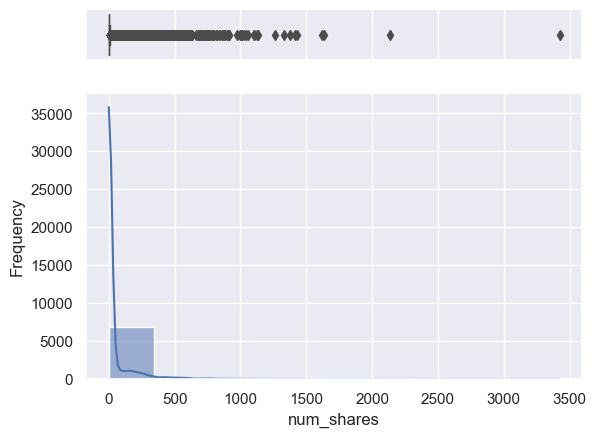

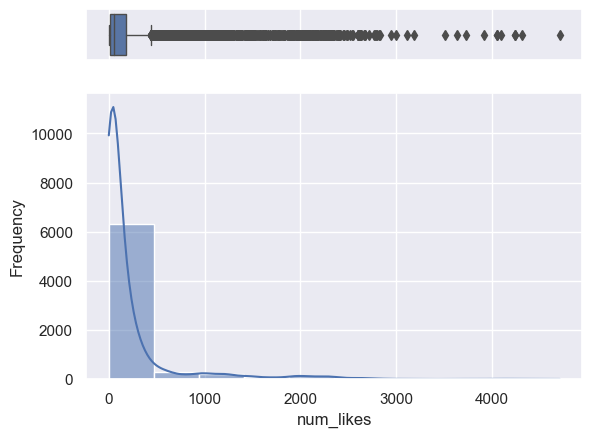

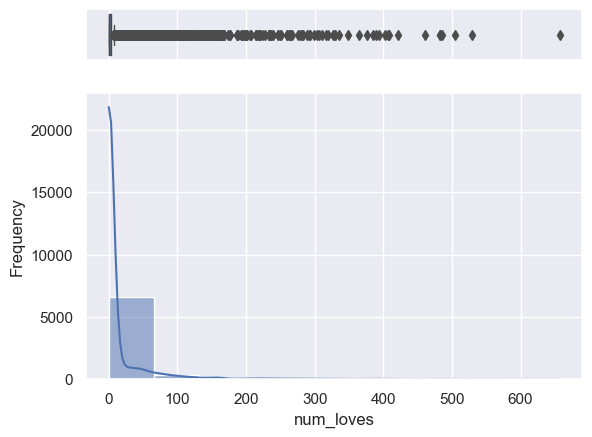

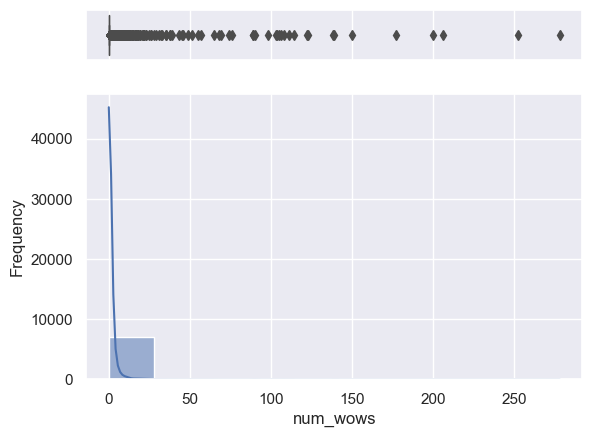

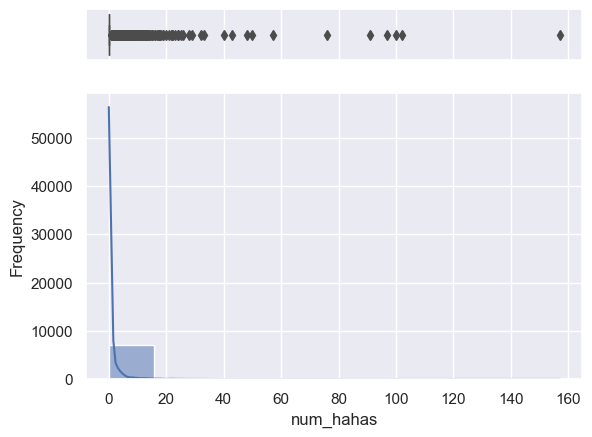

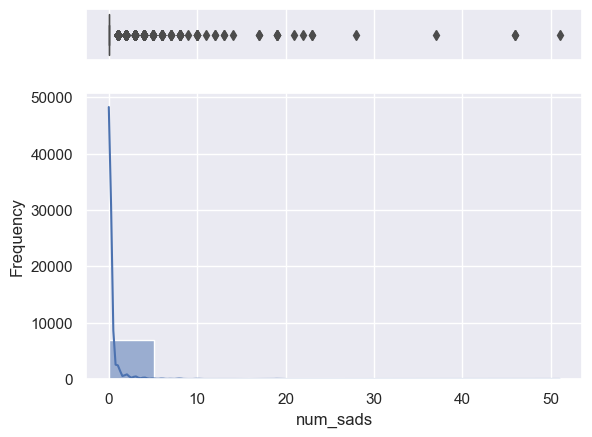

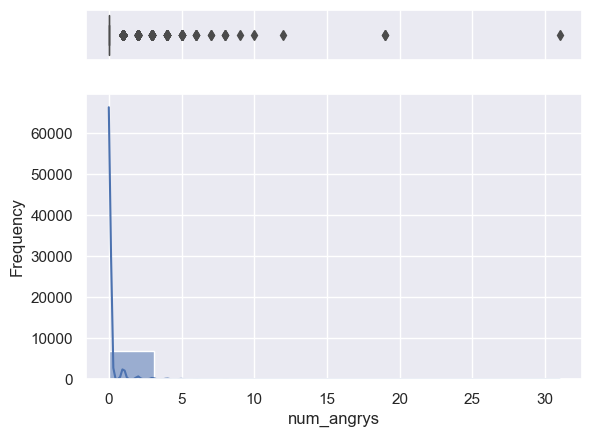

In [14]:
columns = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']

for i in columns:
    plt.figure(figsize=(8, 5))
    plt.close()
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = df[df[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Frequency')

Podemos comprobar que todas las variables que se han graficado presentan ouliers. 


ANALISIS DE DISTRIBUCIÓN 

Voy a comprobar si la muestra de datos tiene una distribución gaussiana a través de Prueba de Shapiro-Wilk: 

Entonces establezco que;

- Ho: Los datos no se ajustan a una distribución normal
- H1: Los datos vienen de una distribución normal
- Alpha: 5%


In [15]:
from scipy.stats import shapiro

In [16]:
df_num = df[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
df_num

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [77]:
sample_size = 5100  # Tamaño de la muestra que deseas tomar
subset_df = df_num.sample(n=sample_size, random_state=42)

estadistico, p_value = shapiro(subset_df)
print('Estadistico=%.3f, p_value=%.3f' % (estadistico, p_value))

Estadistico=0.198, p_value=0.000


En este caso, el pvalue, indica que está por debajo de 0,05 y  por lo tanto sí podemos rechazar la hipótesis nula y dar por confirmada los datos, vienen de una distribución normal.  

Entiendo que la muestra de shapiro para tantos datos quizás no es la prueba indicada, por ello establezco una muestra.

Voy a comprobar la matriz de correlación de las variables. 

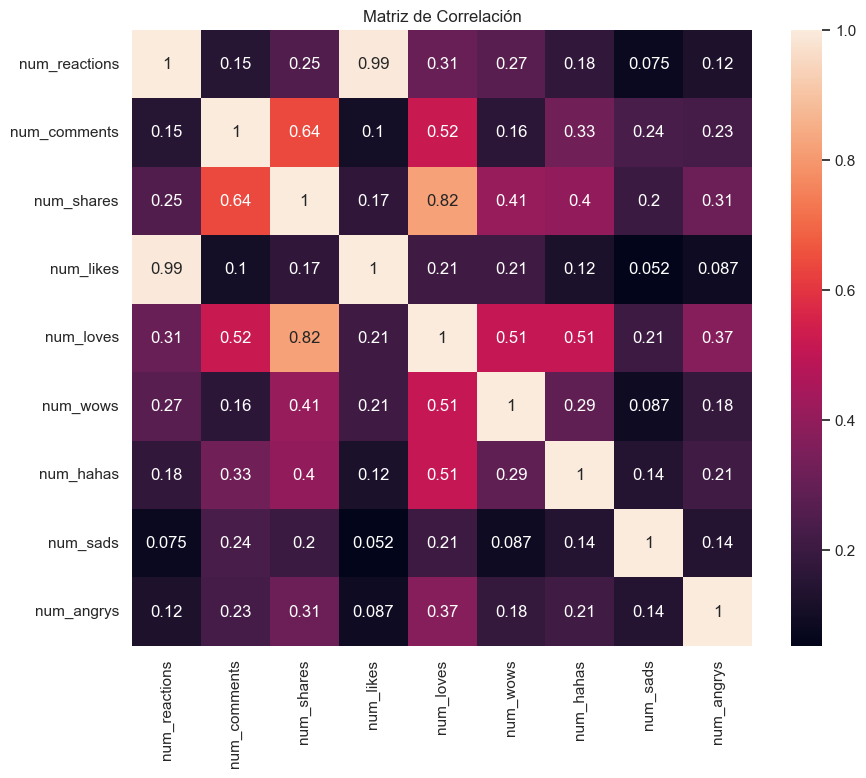

In [18]:
# Matriz de correlación 
correlation_matrix = df_num.corr() 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True) 
plt.title('Matriz de Correlación') 
plt.show() 

De todas las variables las dos que tienen más relación entre ellas son, la variable 'num_reactions' con la variable 'num_likes'. 
Voy a gráficar un gráfico de dispersión con ambas variables. 

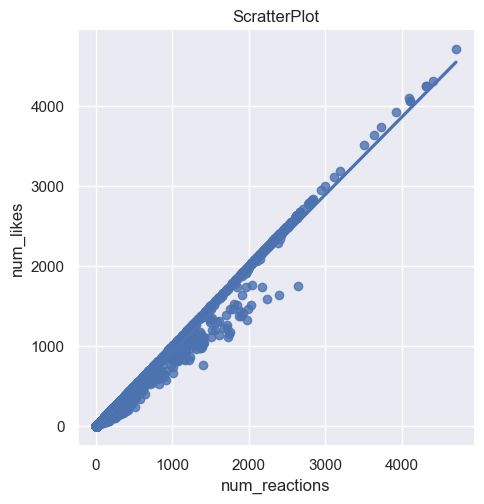

In [19]:
sns.lmplot(
       x= 'num_reactions',
       y= 'num_likes',
       data = df)
plt.title('ScratterPlot')
plt.show()

LIMPIEZA DE DATOS 

Vamos a resolver problemas de datos faltantes, observamos qué variables tienen datos faltantes y qué se puede hacer con ellas. 

In [20]:
print(df.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


Los datos de las variables de Columns no son relevantes, así que podemos eliminarlas del df. 

In [21]:
df_clean = df.drop(['Column1','Column2','Column3', 'Column4'], axis=1)

Bien ahora nos hemos encontrado con que una de las variable, 'status_published' consta como tipo object, y realmente es un tipo de object DateTime, lo cambio. 

In [22]:
df_clean['status_published'] = pd.to_datetime(df_clean['status_published'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 661.1+ KB


TRATAMOS LOS OUTLIERS

Todas las variables numéricas tienen Outliers, un total de 9 variables. Como aplicando la prueba shapiro nos indica que los datos son de distribución normal entonces voy a aplicar StandarScaler para normalizar las variables numéricas y que tengan una media igual a cero y una desviación estándard igual a uno. 


In [23]:
from sklearn.preprocessing import StandardScaler

# 9 variables a escalar
columns_to_scale = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Ajustamos el scaler a las variables seleccionadas
scaler.fit(df[columns_to_scale])

# Transformamos las variables
scaled_variables = scaler.transform(df[columns_to_scale])

# Creamos un nuevo DataFrame con las variables escaladas
df_scaled = pd.DataFrame(scaled_variables, columns=columns_to_scale)
df_scaled

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...
7045,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


Ahora, voy a transformar la columna categórica en Dummy

In [24]:
dummy_columns = pd.get_dummies(df_clean['status_type'])

Y voy a concatenar todos los cambios. 

In [25]:
df1 = pd.concat([df_scaled, dummy_columns], axis=1)
df1

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0,0,0,1
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0,0,0,1
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
7046,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748,0,1,0,0
7047,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0
7048,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0


### - Exercici 1
##### Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

 Important

Tingues en compte que prèviament et caldrà preparar el dataset.

In [26]:
from sklearn.cluster import KMeans

In [27]:
# definir el modelo, establezco de primeras 3 clusters, ya que no sé que valor sea más preciso.
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42).fit(df1)
kmeans

KMeans(n_clusters=4, n_init=10, random_state=42)

In [28]:
df1["cluster"] = kmeans.labels_
df1

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,cluster
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0,0,0,1,2
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0,0
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0,0,0,1,0
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0,0
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0,0
7046,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748,0,1,0,0,0
7047,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0,0
7048,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748,0,1,0,0,0


In [29]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[-2.66602836e-01 -1.79758788e-01 -1.94630631e-01 -2.54592598e-01
  -1.87172887e-01 -8.92917697e-02 -1.09215887e-01 -8.20810721e-02
  -1.10845633e-01  7.91599354e-03  6.54442649e-01  4.63651050e-02
   2.91276252e-01]
 [ 3.39479435e+00 -1.84661076e-01 -2.17746832e-01  3.51504843e+00
  -2.42219391e-01  1.27140727e-01 -1.27053064e-01 -1.32917132e-01
  -1.48543999e-01  3.66492147e-02  5.60209424e-01  2.04188482e-01
   1.98952880e-01]
 [ 5.82123557e-01  2.53635229e+00  2.48746086e+00  3.76338074e-01
   2.27092518e+00  2.51475197e-01  1.08305114e+00  1.12793299e+00
   1.49293604e+00  1.73472348e-18  4.95495495e-02  6.93889390e-18
   9.50450450e-01]
 [ 2.79403685e+00  1.67961793e+00  5.39736106e+00  1.94369348e+00
   7.14227048e+00  1.15439209e+01  7.16782069e+00  1.70746866e+00
   2.35337266e+00 -1.73472348e-18  2.94117647e-02 -6.93889390e-18
   9.70588235e-01]] 35797.65397579569


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns



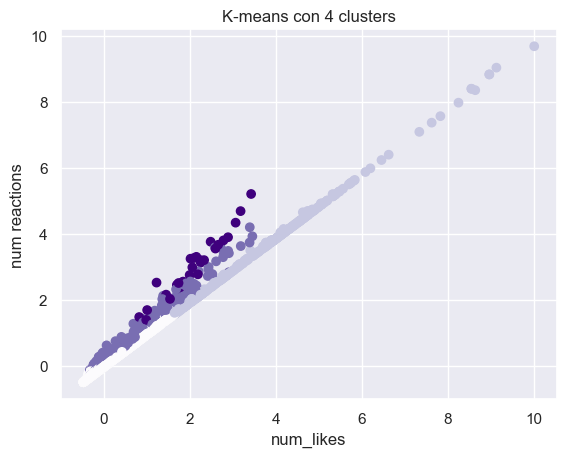

In [31]:
sns.set()

plt.scatter(df1['num_likes'], df1['num_reactions'], c=kmeans.labels_, cmap='Purples')
plt.xlabel('num_likes')
plt.ylabel('num reactions')
plt.title('K-means con 4 clusters')
plt.show()

Para saber si hemos acertado con el número de cluster podemos hacer la prueba del codo y así determinar el valor óptimo de cluster más acertado. 


#### Cálculo del número de clusters

In [32]:
from sklearn.cluster import KMeans

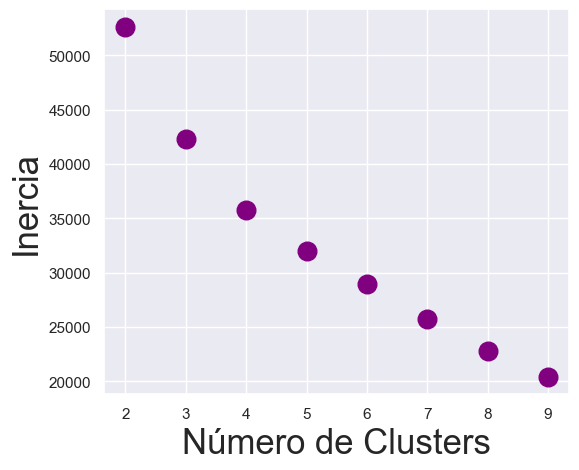

In [33]:
inercias = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(df1)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker='o', s=180, color='purple')
plt.xlabel('Número de Clusters', fontsize=25)
plt.ylabel('Inercia', fontsize=25)
plt.show()

En un primer momento consideré poner 3 clusters, pero cuando llegué a este punto, pude comprobar con la técnica del codo que se ajusta de una manera más óptima con 4 clústers. Así que lo modifiqué. 

### -Exercici 2
#### Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [34]:
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

In [70]:
# definir el modelo
agglomerative_model = AgglomerativeClustering(distance_threshold=0, linkage='ward', n_clusters=None)

# asignar cada punto de datos a un grupo
agglomerative_model.fit(df1)


AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

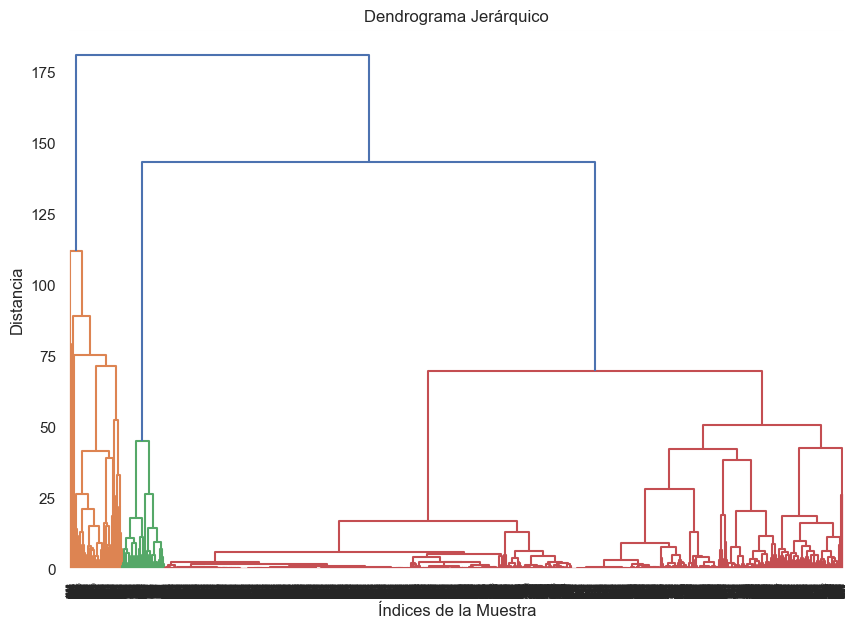

In [51]:
# Realizar el clustering jerárquico
Z = linkage(df1, method='ward')  # 'ward' es un método común para calcular distancias

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índices de la Muestra')
plt.ylabel('Distancia')
plt.show()

### - Exercici 3
##### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

El índice de silhouette es una medida que evalúa la cohesión y separación de los clusters en un conjunto de datos. Es una métrica que varía entre -1 y 1, donde:

- Valores cercanos a 1 indican que las muestras están bien agrupadas y están separadas unas de otras.
- Valores cercanos a 0 indican superposición en la asignación de clusters.
- Valores cercanos a -1 indican que las muestras podrían haber sido asignadas a clusters incorrectos.

In [65]:
from sklearn.metrics import silhouette_score

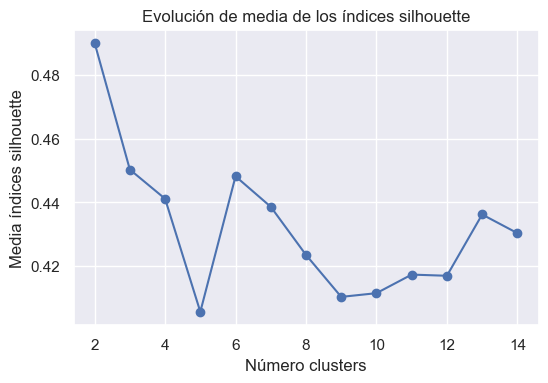

In [67]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric     = 'euclidean',  # Cambia 'affinity' por 'metric'
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(Z)
    silhouette_avg = silhouette_score(Z, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Si la evolución muestra un aumento gradual en la media de los índices de silhouette a medida que aumenta el número de clusters y luego se estabiliza o disminuye, puede indicar que el número óptimo de clusters se encuentra en el punto donde se alcanza el máximo valor de la media del índice de silhouette.

El valor más alto del cluster es el número 2, así que vamos a intentar con el.  

In [73]:
modelo_hclust_ward = AgglomerativeClustering(
                            metric='euclidean',  # Cambia 'affinity' por 'metric'
                            linkage  = 'ward',
                            n_clusters = 2
                     )
modelo_hclust_ward.fit(X=Z)

AgglomerativeClustering(metric='euclidean')

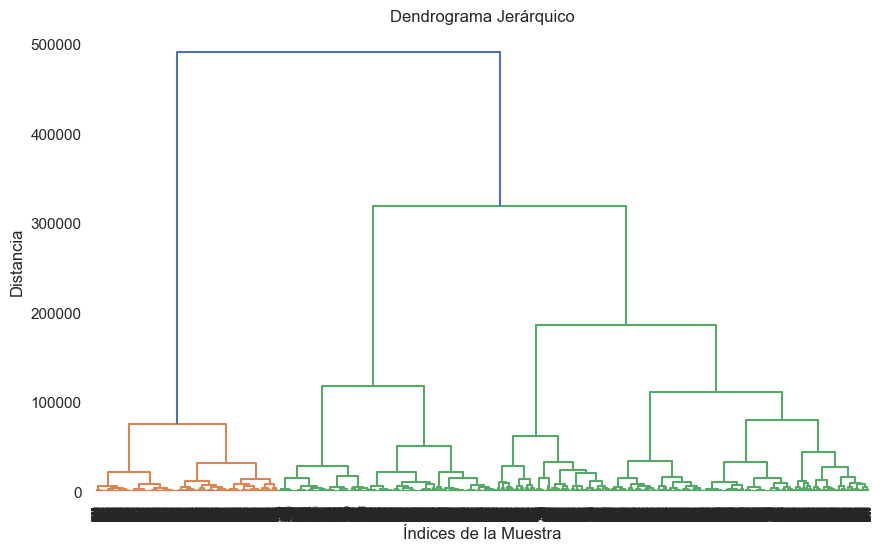

In [75]:
Z = linkage(Z, method='ward', metric='euclidean')

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índices de la Muestra')
plt.ylabel('Distancia')
plt.show()

CONCLUSIÓN: Lo que finalmente indica es que el descenso del indice de silhouette a medida que se aumenta el número de clusters sugiere que, después de un cierto punto(en este caso, cerca del 2), dividir los datos en más no proporciona una mejora en la separación y cohesión de los datos. 

RESUMEN FINAL: En primer lugar, me encontré con unos datos que a primera vista creía que no tenía que hacer muchas modificaciones, pero tenía tres variables categóricas y el resto de variables numéricas. A excepción de las variables denominadas Columns, que no contenian datos. Estas útilmas las eliminé, de igual manera que la variable de id, ya que al aplicar k-means no me permitía variables categóricas. Entonces de las 3 seleccioné la de typo de publicación, que pude transformar en numérica aplicando la transformación Dummies. 

Después me encontré con todas las variables numéricas que tenían outliers, y apliqué StandarScaler para estandarizar las características del conjunto de datos para que tengan una media de 0 y una desviación estándar de 1.

Seguidamente se aplica el algoritmo K-means, y en un primer momento se pone 3 clusters, que al hacer el cálculo de clusters me di cuenta que el valor más óptimo era el 4, y agrupó los datos en 4 grupos. En el gráfico se puede comprobar que algún grupo se solapa con otro. 

Finalmente aplicando el último algoritmo de clustering jerárquico, sin cluster especificado, las muestras se ven muy aglomeradas. 

Y cuando aplicamos el coeficiente de Silhouette, entonces verificamos que 2 clusters es el número que nos proporciona la mejor separación y cohesión de los datos. 
